In [1]:
!pip install tensorflow[and-cuda]==2.17.1

  Using cached tensorflow-2.17.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.7.29-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.12.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.4.107-py3-none-man

# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
import tensorflow
from tensorflow import keras

2024-12-23 16:59:26.475723: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-23 16:59:26.493409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 16:59:26.513003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 16:59:26.518890: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 16:59:26.533263: I tensorflow/core/platform/cpu_feature_guar

In [5]:
from keras.preprocessing.image import load_img

- 299*299
- 224*224
- 150*150

In [6]:
img_path = "./clothing-dataset-small/train/t-shirt"
img_name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_path = f"{img_path}/{img_name}"

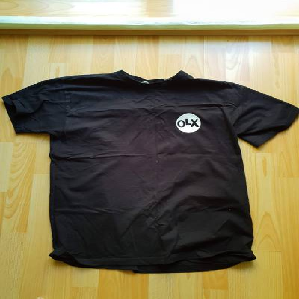

In [7]:
img = load_img(full_path, target_size=(299, 299))
img

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [9]:
from tensorflow.keras.applications.xception import (
    Xception,
    decode_predictions,
    preprocess_input,
)

In [10]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

I0000 00:00:1734973168.523642     851 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734973168.572724     851 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734973168.573096     851 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734973168.574205     851 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [11]:
X = np.array([x])

In [12]:
# Preprocessing required
model.predict(X)

I0000 00:00:1734973171.737017     966 service.cc:146] XLA service 0x7f09f00370c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734973171.737042     966 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-23 16:59:31.773188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-23 16:59:32.123330: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1734973173.989111     966 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [13]:
#  After applying data preprocessing
X = preprocess_input(X)

In [14]:
# Predictions are then relayed as floats btn 0 and 1
pred = model.predict(X)
pred[0, :10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

Add decoding of predictions to find out which class the prediction belongs to

In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196344),
  ('n02916936', 'bulletproof_vest', 0.0381399),
  ('n04370456', 'sweatshirt', 0.034324728),
  ('n03710637', 'maillot', 0.011354211),
  ('n04525038', 'velvet', 0.0018453576)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Training dataset
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Applies preprocess inout function to image
)

In [18]:
train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)  # Loads images into 32 batches

Found 3068 images belonging to 10 classes.


In [19]:
# Validation dataset

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Applies preprocess inout function to image
)

In [20]:
val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation", target_size=(150, 150), batch_size=32
)

Found 341 images belonging to 10 classes.


In [21]:
# Creating theh model
base_model = Xception(
    weights="imagenet",  # Uses images pretrained on iMAGENET
    include_top=False,  # Keeps only the convolutional layer
    input_shape=(150, 150, 3),
)

base_model.trainable = False

Note the include_top parameter: this way, we explicitly specify that we’re not interested
in the dense layers of the pretrained neural network, only in the convolutional
layers. In Keras terminology, the “top” is the set of final layers of the network

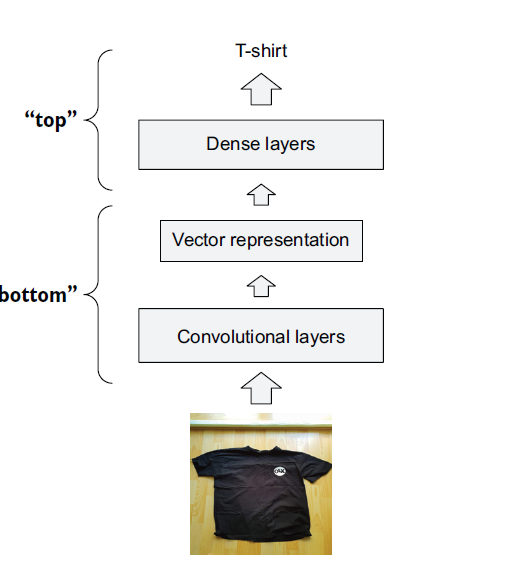

Even though base_model is already a model, we use it as a function and give it two parameters — `inputs`, and `training=False`:
- The first parameter says what will be the input to base_model. It will come from inputs.
- The second parameter (training=False) is optional and says that we don’t want to train the base model.

The result is base, which is a functional component (like base_model) that we can combine with other components. We use it as the input to the next layer

In [22]:
# Specify the size of expected arrays
inputs = keras.Input(shape=(150, 150, 3))

# Use base model to extract high level features
base = base_model(inputs, training=False)

# Extract vector representation: Converts output of base_model to a vector
"""
create a pooling layer — a special construction that allows us to convert the output of a convolutional layer (a 3-D array) into a vector (a one-dimensional
array).
"""
# vector = keras.layers.GlobalAveragePooling2D()(base)

pooling = keras.layers.GlobalAveragePooling2D()
vector = pooling(base)

# Add a dense layer of size 10 -> 1 element of each class
# outputs = keras.layers.Dense(10)(vector)

# alternatively
outputs = keras.layers.Dense(10)(vector)

# combine inputs and outputs
model = keras.Model(inputs, outputs)

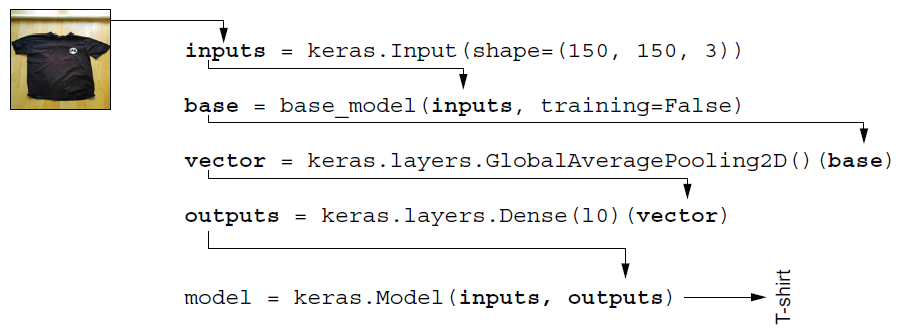

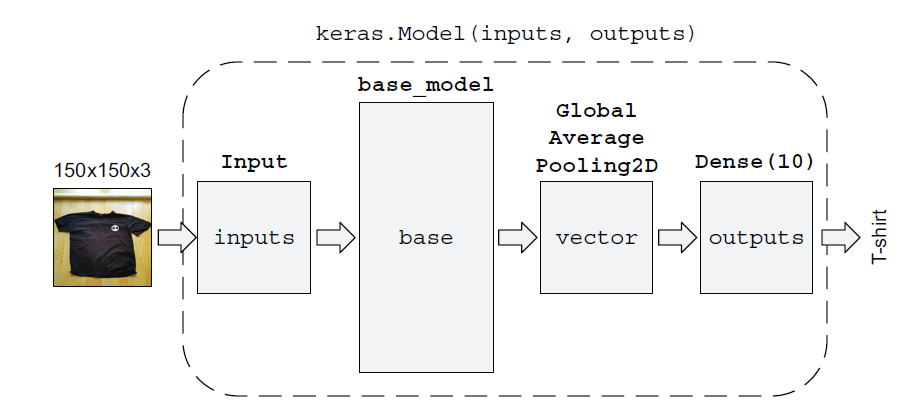

#### Training the model

To train a model, the optimizer needs to know whether the model is doing well. For that, it uses a loss function, which becomes smaller as the network becomes better. The goal of the optimizer is to minimize this loss.
The keras.losses package offers many different losses. Here’s a list of the most important ones:
- **BinaryCrossentropy**: For training a binary classifier
- **CategoricalCrossentropy**: For training a classification model with multiple classes
- **MeanSquaredError**: For training a regression model


In [23]:
# An optimizer needed to adkjust weights

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate)

"""
Because we need to classify clothing into 10 different classes, we use the categorical cross-entropy loss:
"""

# If outputs has activation = softmax, categorical_crossentropy can eliminate from_logits
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

- `train_ds`: The dataset for training
- `epochs`: The number of times it will go over the training data
- `validation_data`: The dataset for evaluation

In [24]:
!nvidia-smi

Mon Dec 23 16:59:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.12              Driver Version: 550.90.12      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   26C    P0             31W /   70W |   14069MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.5841 - loss: 1.7202 - val_accuracy: 0.7625 - val_loss: 0.9055
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8389 - loss: 0.5284 - val_accuracy: 0.7654 - val_loss: 0.8468
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9006 - loss: 0.2898 - val_accuracy: 0.8065 - val_loss: 0.8223
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9096 - loss: 0.2525 - val_accuracy: 0.7918 - val_loss: 0.8069
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9460 - loss: 0.1569 - val_accuracy: 0.7830 - val_loss: 0.9151
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9567 - loss: 0.1202 - val_accuracy: 0.8065 - val_loss: 0.9014
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9716 - loss: 0.0854 - val_accuracy: 0.8240 - val_loss: 0.8325
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9906 - loss: 0.0402 - val_accuracy: 0.7918 - val_loss: 

In [26]:
!nvidia-smi

Mon Dec 23 17:00:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.12              Driver Version: 550.90.12      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   40C    P0             33W /   70W |   14077MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

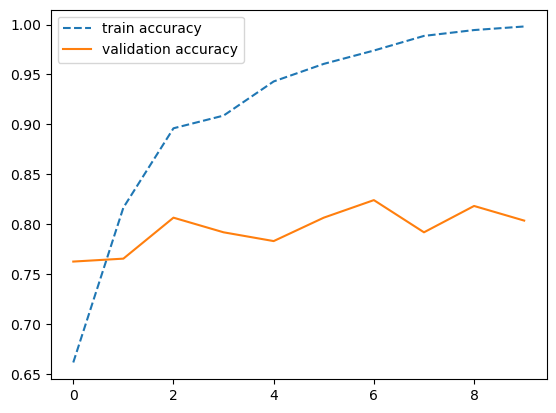

In [27]:
plt.plot(history.history["accuracy"], label="train accuracy", linestyle="dashed")
plt.plot(history.history["val_accuracy"], label="validation accuracy")

plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [28]:
def define_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet",  # Uses images pretrained on iMAGENET
        include_top=False,  # Keeps only the convolutional layer
        input_shape=(150, 150, 3),
    )

    base_model.trainable = False
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(10)(vector)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [29]:
learning_rates = [0.001, 0.01, 0.1, 0.0001]
epochs = 10
scores = {}

for lr in learning_rates:
    print(lr)
    model = define_model(learning_rate=lr)
    history = model.fit(x=train_ds, epochs=10, validation_data=val_ds)

    scores[lr] = history.history
    print()
    print()

0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.4882 - loss: 1.4762 - val_accuracy: 0.7625 - val_loss: 0.7095
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7632 - loss: 0.6609 - val_accuracy: 0.8065 - val_loss: 0.6191
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8374 - loss: 0.5087 - val_accuracy: 0.8094 - val_loss: 0.5733
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8640 - loss: 0.4359 - val_accuracy: 0.7830 - val_loss: 0.5942
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8877 - loss: 0.3771 - val_accuracy: 0.8211 - val_loss: 0.5365
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9173 - loss: 0.3262 - val_accuracy: 0.8240 - val_loss: 0.5511
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9291 - loss: 0.2718 - val_accuracy: 0.8240 - val_loss: 0.5314
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9446 - loss: 0.2435 - val_accuracy: 0.

In [30]:
scores

{0.001: {'accuracy': [0.6248370409011841,
   0.7799869775772095,
   0.8337679505348206,
   0.8644067645072937,
   0.887222945690155,
   0.9116688370704651,
   0.920469343662262,
   0.9357888102531433,
   0.9494785070419312,
   0.9569752216339111],
  'loss': [1.089685082435608,
   0.6348066329956055,
   0.5058227181434631,
   0.4255208671092987,
   0.3670959770679474,
   0.31989771127700806,
   0.28053560853004456,
   0.25790002942085266,
   0.2290668934583664,
   0.2055978626012802],
  'val_accuracy': [0.7624633312225342,
   0.8064516186714172,
   0.8093841671943665,
   0.7829912304878235,
   0.8211143612861633,
   0.8240469098091125,
   0.8240469098091125,
   0.8240469098091125,
   0.8240469098091125,
   0.8181818127632141],
  'val_loss': [0.7094997763633728,
   0.6191067695617676,
   0.5733495950698853,
   0.594159722328186,
   0.5365467071533203,
   0.5510913729667664,
   0.5313578844070435,
   0.5290717482566833,
   0.5333222150802612,
   0.5611273646354675]},
 0.01: {'accuracy': [

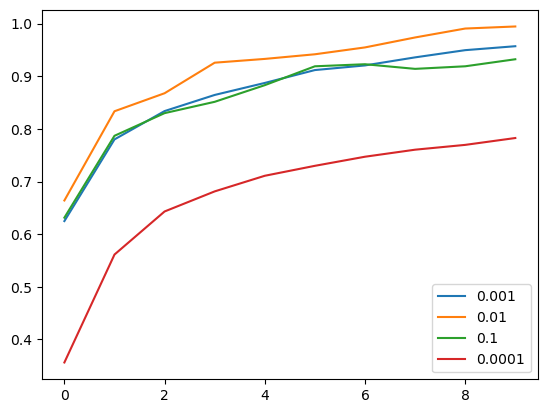

In [31]:
for learning_rate, history in scores.items():
    plt.plot(history["accuracy"], label=learning_rate)
    # plt.plot(history['val_accuracy'], label=learning_rate)
    plt.legend()

In [32]:
# drop 2 learning rates
del scores[0.0001]
del scores[0.01]

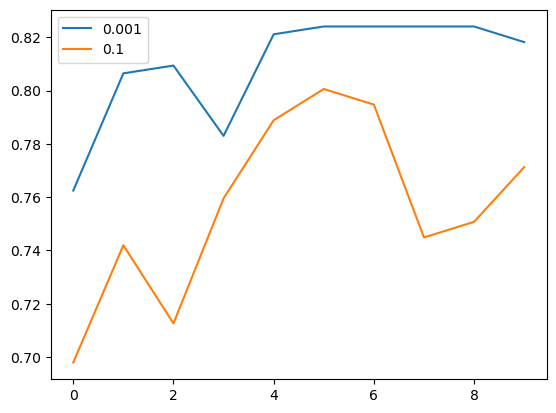

In [33]:
# Draw down to 2 learning rates
for learning_rate, history in scores.items():
    plt.plot(history["val_accuracy"], label=learning_rate)
    plt.legend()

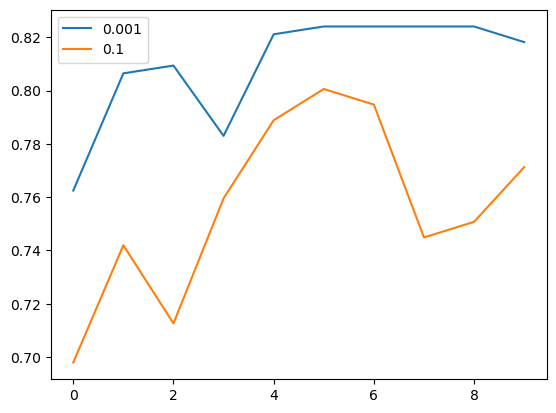

In [34]:
# Draw down to 2 learning rates
for learning_rate, history in scores.items():
    plt.plot(history["val_accuracy"], label=learning_rate)
    plt.legend()

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [35]:
# saving model - --- File format .h5
from tensorflow import keras

In [36]:
model.save_weights("xception_v1_model.weights.h5")

In [37]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy",
)

In [38]:
learning_rate = 0.001
model = define_model(learning_rate=learning_rate)

history = model.fit(
    x=train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.5073 - loss: 1.4436 - val_accuracy: 0.7830 - val_loss: 0.6993
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7882 - loss: 0.6332 - val_accuracy: 0.8006 - val_loss: 0.6069
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8355 - loss: 0.4973 - val_accuracy: 0.7977 - val_loss: 0.5690
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8708 - loss: 0.4208 - val_accuracy: 0.7977 - val_loss: 0.5519
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8902 - loss: 0.3734 - val_accuracy: 0.8152 - val_loss: 0.5442
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9063 - loss: 0.3179 - val_accuracy: 0.8211 - val_loss: 0.5151
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9269 - loss: 0.2832 - val_accuracy: 0.8211 - val_loss: 0.5113
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9386 - loss: 0.2580 - val_accuracy: 0.8299 -

In [39]:
history.history

{'accuracy': [0.6264667510986328,
  0.7865058779716492,
  0.8308344483375549,
  0.8686440587043762,
  0.8849413394927979,
  0.9012386202812195,
  0.9207953214645386,
  0.933833122253418,
  0.9458931088447571,
  0.9517601132392883],
 'loss': [1.0912829637527466,
  0.6271688938140869,
  0.5075539946556091,
  0.42651620507240295,
  0.37398719787597656,
  0.3275526762008667,
  0.28815019130706787,
  0.25746676325798035,
  0.23133374750614166,
  0.21132420003414154],
 'val_accuracy': [0.7829912304878235,
  0.8005865216255188,
  0.7976539731025696,
  0.7976539731025696,
  0.8152492642402649,
  0.8211143612861633,
  0.8211143612861633,
  0.829912006855011,
  0.8181818127632141,
  0.8240469098091125],
 'val_loss': [0.6993111371994019,
  0.6068913340568542,
  0.5689931511878967,
  0.5519011616706848,
  0.5442327857017517,
  0.5150838494300842,
  0.5112563371658325,
  0.5264672636985779,
  0.5235276818275452,
  0.5394408106803894]}

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [40]:
def define_model(learning_rate=0.01, size=100):
    base_model = Xception(
        weights="imagenet",  # Uses images pretrained on iMAGENET
        include_top=False,  # Keeps only the convolutional layer
        input_shape=(150, 150, 3),
    )

    base_model.trainable = False
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner_layer = keras.layers.Dense(
        size,
        activation="relu",
    )(vector)

    outputs = keras.layers.Dense(10)(inner_layer)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [41]:
sizes = [1, 10, 50, 100, 500, 1000]
epochs = 10
scores = {}

for size in sizes:
    print(size)
    model = define_model(learning_rate=0.001, size=size)
    history = model.fit(x=train_ds, epochs=10, validation_data=val_ds)

    scores[size] = history.history
    print()
    print()

1
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.2462 - loss: 2.3010 - val_accuracy: 0.2375 - val_loss: 2.2728
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.2699 - loss: 2.2599 - val_accuracy: 0.2375 - val_loss: 2.2475
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2627 - loss: 2.2297 - val_accuracy: 0.2375 - val_loss: 2.2275
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2631 - loss: 2.2047 - val_accuracy: 0.2375 - val_loss: 2.2111
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.2400 - loss: 2.1965 - val_accuracy: 0.2375 - val_loss: 2.1982
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2454 - loss: 2.1815 - val_accuracy: 0.2375 - val_loss: 2.1879
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2514 - loss: 2.1639 - val_accuracy: 0.2375 - val_loss: 2.1799
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2708 - loss: 2.1467 - val_accuracy: 0.2375

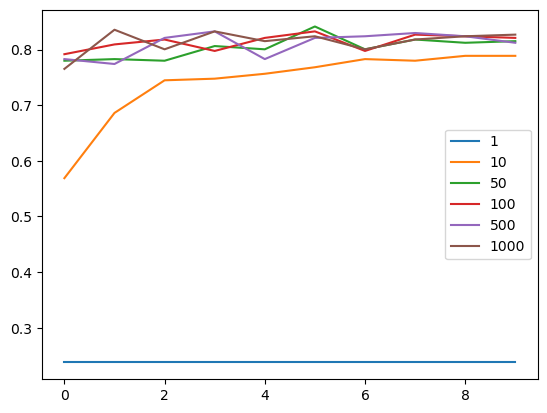

In [42]:
# Draw down to 2 learning rates

# del scores[10]
# del scores[1]
# del scores[50]

for learning_rate, history in scores.items():
    # plt.plot(history["accuracy"], label=learning_rate)
    plt.plot(history["val_accuracy"], label=learning_rate)
    plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [43]:
def define_model(droprate,learning_rate=0.001, size=100):
    base_model = Xception(
        weights="imagenet",  # Uses images pretrained on iMAGENET
        include_top=False,  # Keeps only the convolutional layer
        input_shape=(150, 150, 3),
    )

    base_model.trainable = False
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner_layer = keras.layers.Dense(
        size,
        activation="relu",
    )(vector)

    drop = keras.layers.Dropout(droprate)(inner_layer)
    
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [47]:
droprates = [0.0,0.2,0.5,0.8]

scores = {}
for droprate in droprates:
    print('droprate', droprate)
    model = define_model(droprate=droprate)
    history = model.fit(x=train_ds, epochs=30, validation_data=val_ds)

    scores[dropout] = history.history
    print()
    print()
    

droprate 0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.5707 - loss: 1.2833 - val_accuracy: 0.7742 - val_loss: 0.6709
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8226 - loss: 0.5193 - val_accuracy: 0.8152 - val_loss: 0.5578
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8856 - loss: 0.3482 - val_accuracy: 0.8035 - val_loss: 0.5978
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9291 - loss: 0.2405 - val_accuracy: 0.8035 - val_loss: 0.6236
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9504 - loss: 0.1813 - val_accuracy: 0.8094 - val_loss: 0.6081
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9710 - loss: 0.1268 - val_accuracy: 0.8152 - val_loss: 0.6246
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9850 - loss: 0.0878 - val_accuracy: 0.8270 - val_loss: 0.6524
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9882 - loss: 0.0700 - val_accur

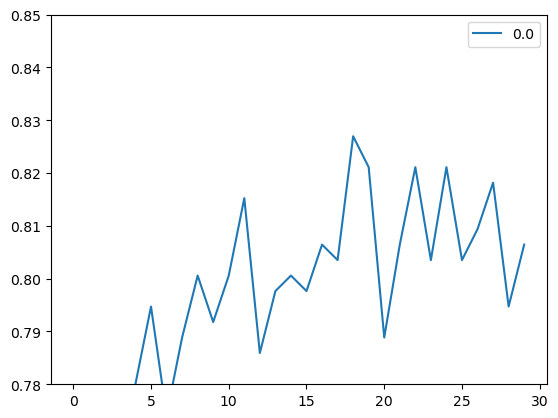

In [48]:
# del scores[0.8]
for dropout, history in scores.items():
    # plt.plot(history["accuracy"], label=dropout)
    plt.plot(history["val_accuracy"], label=dropout,)
    plt.ylim(0.78,0.85)
    plt.legend()

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=10.0,
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32
) 

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input 
)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation", 
    target_size=(150, 150), 
    batch_size=32,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [52]:
learning_rate=0.001
size=100
droprate=0.2

model = define_model(
    learning_rate=learning_rate,
    size=size,
    droprate=droprate
)

history = model.fit(train_ds,epochs=50,validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5370 - loss: 1.4174

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.5378 - loss: 1.4144 - val_accuracy: 0.7771 - val_loss: 0.6516
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.7626 - loss: 0.6984 - val_accuracy: 0.7918 - val_loss: 0.6067
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.7903 - loss: 0.6045 - val_accuracy: 0.7889 - val_loss: 0.5659
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.8192 - loss: 0.5003 - val_accuracy: 0.8240 - val_loss: 0.5410
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8534 - loss: 0.4255 - val_accuracy: 0.8240 - val_loss: 0.5067
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8780 - loss: 0.3779 - val_accuracy: 0.8299 - val_loss: 0.5129
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8776 - loss: 0.3559 - val_accuracy: 0.8211 - val_loss: 0.5180
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.8803 - loss: 0.3410 - val_accuracy: 0.821

In [54]:
hist = history.history

Text(0, 0.5, 'Validation accuracy')

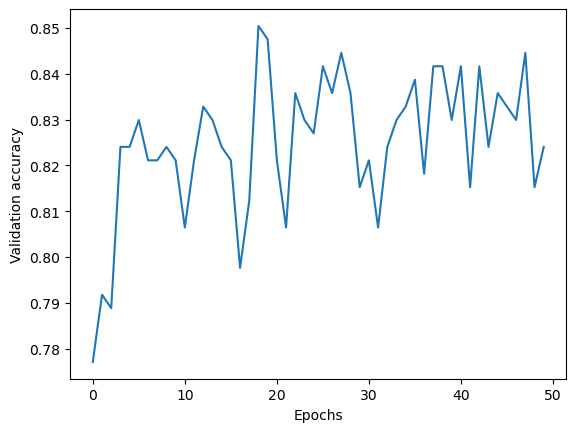

In [56]:
plt.plot(hist['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')


## 8.11 Training a larger model

* Train a 299x299 model

In [71]:
image_size = 299
batch_size = 32

In [72]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy",
)

In [73]:
def define_model(droprate,image_size = image_size,learning_rate=0.001, size=100):
    base_model = Xception(
        weights="imagenet",  # Uses images pretrained on iMAGENET
        include_top=False,  # Keeps only the convolutional layer
        input_shape=(image_size, image_size, 3),
    )

    base_model.trainable = False
    inputs = keras.Input(shape=(image_size, image_size, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner_layer = keras.layers.Dense(
        size,
        activation="relu",
    )(vector)

    drop = keras.layers.Dropout(droprate)(inner_layer)
    
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [68]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=10.0,
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train", 
    target_size=(image_size, image_size), 
    batch_size=batch_size
) 

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input 
)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation", 
    target_size=(image_size, image_size), 
    batch_size=batch_size,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [74]:
learning_rate=0.001
size=100
droprate=0.2

model = define_model(
    learning_rate=learning_rate,
    size=size,
    droprate=droprate
)

history = model.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=checkpoint)

Epoch 1/50
39/96 ━━━━━━━━━━━━━━━━━━━━ 29s 510ms/step - accuracy: 0.4884 - loss: 1.5222

E0000 00:00:1734977022.405254     966 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977022.635655     966 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977022.980361     966 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977023.249259     966 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977024.263048     966 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.6085 - loss: 1.1857

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
E0000 00:00:1734977068.531332     969 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977068.756049     969 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734977069.057032     969 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1

96/96 ━━━━━━━━━━━━━━━━━━━━ 87s 843ms/step - accuracy: 0.6097 - loss: 1.1820 - val_accuracy: 0.8592 - val_loss: 0.4362
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 543ms/step - accuracy: 0.8431 - loss: 0.4624 - val_accuracy: 0.8622 - val_loss: 0.4171
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 535ms/step - accuracy: 0.8577 - loss: 0.4222 - val_accuracy: 0.8739 - val_loss: 0.3702
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.8890 - loss: 0.3227 - val_accuracy: 0.8710 - val_loss: 0.3615
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.8802 - loss: 0.3172 - val_accuracy: 0.8710 - val_loss: 0.3619
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 550ms/step - accuracy: 0.8947 - loss: 0.2892 - val_accuracy: 0.8856 - val_loss: 0.3658
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 542ms/step - accuracy: 0.9170 - loss: 0.2531 - val_accuracy: 0.8680 - val_loss: 0.3762
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 533ms/step - accuracy: 0.9276 - loss: 0.2172 - val_accuracy: 0.873

Text(0, 0.5, 'Validation accuracy')

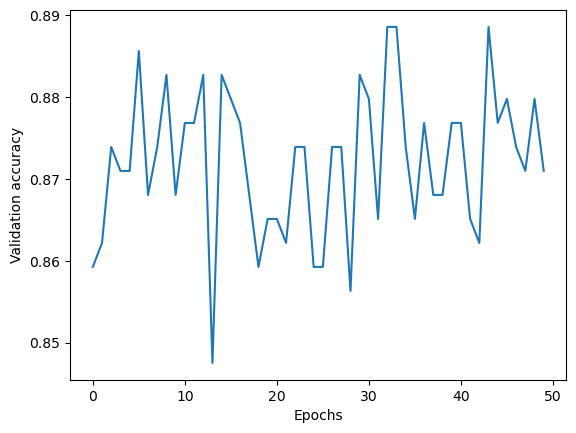

In [76]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import preprocess_input

In [3]:
model = keras.models.load_model('xception_v4_33_0.889.keras')

I0000 00:00:1735028852.273166     877 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735028852.320332     877 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735028852.320581     877 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735028852.321558     877 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test/',
    target_size=(299,299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [5]:
model.evaluate(test_ds)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735028874.798649    1407 service.cc:146] XLA service 0x7f16e40040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735028874.798680    1407 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-24 08:27:54.849651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-24 08:27:55.225437: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1735028882.

 1/12 ━━━━━━━━━━━━━━━━━━━━ 3:11 17s/step - accuracy: 0.8125 - loss: 0.4004

I0000 00:00:1735028890.068869    1407 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8455 - loss: 0.4596

E0000 00:00:1735028896.832718    1405 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1735028897.054085    1405 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1735028897.346075    1405 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1735028897.577544    1405 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1735028898.451100    1405 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8532 - loss: 0.4399 


[0.3313114643096924, 0.8951612710952759]

In [8]:
path = './clothing-dataset-small/test/pants/05814dc4-0520-47e6-91e0-402a971ba40a.jpg'

In [12]:
img = load_img(path,target_size=(299,299))

In [19]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [22]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [24]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[-3.332269 , -9.086707 , -2.654113 , -6.394835 , 12.47303  ,
        -5.0235176, -3.9793289,  1.6799597, -4.719265 , -4.969595 ]],
      dtype=float32)

In [27]:
dict(zip(classes,pred[0]))

{'dress': -3.332269,
 'hat': -9.086707,
 'longsleeve': -2.654113,
 'outwear': -6.394835,
 'pants': 12.47303,
 'shirt': -5.0235176,
 'shoes': -3.9793289,
 'shorts': 1.6799597,
 'skirt': -4.719265,
 't-shirt': -4.969595}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

